# Cleaning Google's Mobility Data for the Bay Area

The data provided by Google starts on February 2020 due to the COVID-19 Pandemic (https://www.google.com/covid19/mobility/). Documentation about the data can be found here: https://www.google.com/covid19/mobility/data_documentation.html?hl=en

In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
US_Mobility = pd.read_csv("Data/2020_US_Region_Mobility_Report.csv")
US_Mobility.head(10)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
5,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-20,1.0,0.0,4.0,0.0,0.0,1.0
6,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-21,2.0,-2.0,4.0,1.0,0.0,0.0
7,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-22,7.0,3.0,23.0,5.0,4.0,-1.0
8,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-23,7.0,3.0,23.0,5.0,2.0,-1.0
9,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-24,2.0,1.0,9.0,1.0,3.0,0.0


In [3]:
a = list(US_Mobility.columns)
b = [2,3,7,8,9,10,11,12,13]
c = [ a[i] for i in b]
c

['sub_region_1',
 'sub_region_2',
 'date',
 'retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

In [4]:
#Removing Superflous Columns, Subregion1 is the state, sub region 2 is the county
US_Mobility = US_Mobility[c]
US_Mobility.columns = ['STATE','COUNTY','DATE','RETAIL/RECREATION','GROCERY/PHARMACY','PARKS',
                       'TRANSIT/STATIONS','WORKPLACES','RESIDENTIAL']
US_Mobility.head(10)

,STATE,COUNTY,DATE,RETAIL/RECREATION,GROCERY/PHARMACY,PARKS,TRANSIT/STATIONS,WORKPLACES,RESIDENTIAL
0,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
5,NaN,NaN,2020-02-20,1.0,0.0,4.0,0.0,0.0,1.0
6,NaN,NaN,2020-02-21,2.0,-2.0,4.0,1.0,0.0,0.0
7,NaN,NaN,2020-02-22,7.0,3.0,23.0,5.0,4.0,-1.0
8,NaN,NaN,2020-02-23,7.0,3.0,23.0,5.0,2.0,-1.0
9,NaN,NaN,2020-02-24,2.0,1.0,9.0,1.0,3.0,0.0


In [5]:
#Keeping only California data
CA_Mobility = US_Mobility.loc[US_Mobility['STATE']=='California']
CA_Mobility.head(10)

,STATE,COUNTY,DATE,RETAIL/RECREATION,GROCERY/PHARMACY,PARKS,TRANSIT/STATIONS,WORKPLACES,RESIDENTIAL
48484,California,NaN,2020-02-15,1.0,1.0,19.0,1.0,-1.0,0.0
48485,California,NaN,2020-02-16,5.0,0.0,31.0,1.0,-1.0,-1.0
48486,California,NaN,2020-02-17,9.0,1.0,44.0,-12.0,-38.0,8.0
48487,California,NaN,2020-02-18,0.0,0.0,16.0,3.0,0.0,0.0
48488,California,NaN,2020-02-19,0.0,0.0,13.0,1.0,0.0,0.0
48489,California,NaN,2020-02-20,2.0,1.0,12.0,1.0,0.0,0.0
48490,California,NaN,2020-02-21,1.0,0.0,8.0,0.0,1.0,0.0
48491,California,NaN,2020-02-22,0.0,0.0,-3.0,-4.0,1.0,1.0
48492,California,NaN,2020-02-23,4.0,1.0,16.0,3.0,2.0,0.0
48493,California,NaN,2020-02-24,2.0,0.0,12.0,1.0,4.0,0.0


In [6]:
#Removing Null values
CA_Mobility = CA_Mobility.loc[CA_Mobility['COUNTY'].notna()]
CA_Mobility.head(10)

,STATE,COUNTY,DATE,RETAIL/RECREATION,GROCERY/PHARMACY,PARKS,TRANSIT/STATIONS,WORKPLACES,RESIDENTIAL
48808,California,Alameda County,2020-02-15,1.0,0.0,22.0,1.0,0.0,-1.0
48809,California,Alameda County,2020-02-16,7.0,0.0,24.0,5.0,1.0,-2.0
48810,California,Alameda County,2020-02-17,13.0,1.0,55.0,-31.0,-53.0,11.0
48811,California,Alameda County,2020-02-18,-2.0,3.0,21.0,3.0,0.0,0.0
48812,California,Alameda County,2020-02-19,-1.0,0.0,14.0,1.0,0.0,0.0
48813,California,Alameda County,2020-02-20,1.0,1.0,13.0,2.0,0.0,0.0
48814,California,Alameda County,2020-02-21,1.0,1.0,8.0,-1.0,3.0,0.0
48815,California,Alameda County,2020-02-22,1.0,3.0,18.0,-2.0,4.0,-1.0
48816,California,Alameda County,2020-02-23,4.0,4.0,26.0,15.0,3.0,-1.0
48817,California,Alameda County,2020-02-24,0.0,0.0,9.0,0.0,4.0,0.0


In [7]:
#Loading Bay Area County List
with open('Data/BA_COUNTY_DATA.json') as f:
    BA_COUNTIES  = json.load(f)
list(BA_COUNTIES.keys())

['Alameda',
 'Contra Costa',
 'Marin',
 'Napa',
 'San Francisco',
 'San Mateo',
 'Santa Clara',
 'Solano',
 'Sonoma']

In [8]:
#Checking County Names in Dataset
CA_Mobility['COUNTY'].unique()

array(['Alameda County', 'Amador County', 'Butte County',
       'Calaveras County', 'Colusa County', 'Contra Costa County',
       'Del Norte County', 'El Dorado County', 'Fresno County',
       'Glenn County', 'Humboldt County', 'Imperial County',
       'Inyo County', 'Kern County', 'Kings County', 'Lake County',
       'Lassen County', 'Los Angeles County', 'Madera County',
       'Marin County', 'Mariposa County', 'Mendocino County',
       'Merced County', 'Modoc County', 'Mono County', 'Monterey County',
       'Napa County', 'Nevada County', 'Orange County', 'Placer County',
       'Plumas County', 'Riverside County', 'Sacramento County',
       'San Benito County', 'San Bernardino County', 'San Diego County',
       'San Francisco County', 'San Joaquin County',
       'San Luis Obispo County', 'San Mateo County',
       'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County',
       'Shasta County', 'Siskiyou County', 'Solano County',
       'Sonoma County', 'Stanisl

In [9]:
#Removing the word ' County'
CA_Mobility['COUNTY'] = CA_Mobility['COUNTY'].str.replace(' County','')
CA_Mobility.head(10)

,STATE,COUNTY,DATE,RETAIL/RECREATION,GROCERY/PHARMACY,PARKS,TRANSIT/STATIONS,WORKPLACES,RESIDENTIAL
48808,California,Alameda,2020-02-15,1.0,0.0,22.0,1.0,0.0,-1.0
48809,California,Alameda,2020-02-16,7.0,0.0,24.0,5.0,1.0,-2.0
48810,California,Alameda,2020-02-17,13.0,1.0,55.0,-31.0,-53.0,11.0
48811,California,Alameda,2020-02-18,-2.0,3.0,21.0,3.0,0.0,0.0
48812,California,Alameda,2020-02-19,-1.0,0.0,14.0,1.0,0.0,0.0
48813,California,Alameda,2020-02-20,1.0,1.0,13.0,2.0,0.0,0.0
48814,California,Alameda,2020-02-21,1.0,1.0,8.0,-1.0,3.0,0.0
48815,California,Alameda,2020-02-22,1.0,3.0,18.0,-2.0,4.0,-1.0
48816,California,Alameda,2020-02-23,4.0,4.0,26.0,15.0,3.0,-1.0
48817,California,Alameda,2020-02-24,0.0,0.0,9.0,0.0,4.0,0.0


In [10]:
#Checking County Names in Dataset
CA_Mobility['COUNTY'].unique()

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [11]:
#Keeping only Bay Area Counties
indaqi = []
ir = np.array(CA_Mobility['COUNTY']=='0')
#print(list(cali_AQI['Site Name'].unique()))

for iq in list(BA_COUNTIES.keys()):
    ib = np.array(CA_Mobility['COUNTY']==iq)
    ir = np.logical_or(ir,ib)
BA_Mobility = CA_Mobility.loc[ir,('COUNTY','DATE','RETAIL/RECREATION','GROCERY/PHARMACY','PARKS',
                                  'TRANSIT/STATIONS','WORKPLACES','RESIDENTIAL')].reset_index(drop=True)
BA_Mobility

,COUNTY,DATE,RETAIL/RECREATION,GROCERY/PHARMACY,PARKS,TRANSIT/STATIONS,WORKPLACES,RESIDENTIAL
0,Alameda,2020-02-15,1.0,0.0,22.0,1.0,0.0,-1.0
1,Alameda,2020-02-16,7.0,0.0,24.0,5.0,1.0,-2.0
2,Alameda,2020-02-17,13.0,1.0,55.0,-31.0,-53.0,11.0
3,Alameda,2020-02-18,-2.0,3.0,21.0,3.0,0.0,0.0
4,Alameda,2020-02-19,-1.0,0.0,14.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2911,Sonoma,2020-12-30,-29.0,-6.0,-2.0,-59.0,-44.0,16.0
2912,Sonoma,2020-12-31,-28.0,12.0,7.0,-59.0,-52.0,17.0
2913,Sonoma,2021-01-01,-55.0,-34.0,1.0,-72.0,-76.0,27.0
2914,Sonoma,2021-01-02,-41.0,-19.0,-40.0,-63.0,-29.0,13.0


In [12]:
#Checking for null values
BA_Mobility.isnull().sum()

COUNTY                 0
DATE                   0
RETAIL/RECREATION      0
GROCERY/PHARMACY      16
PARKS                106
TRANSIT/STATIONS     137
WORKPLACES             9
RESIDENTIAL            6
dtype: int64

There seem to be a couple of values for which there is null values. These are concentrated in the Napa, Solano, Marin, and Sonoma Counties. Google recommends to treat these missing values as *true unknowns*. For the purpose of this work, we leave them as is for the moment and assume a large value if needed later on.

<AxesSubplot:xlabel='None-COUNTY', ylabel='DATE'>

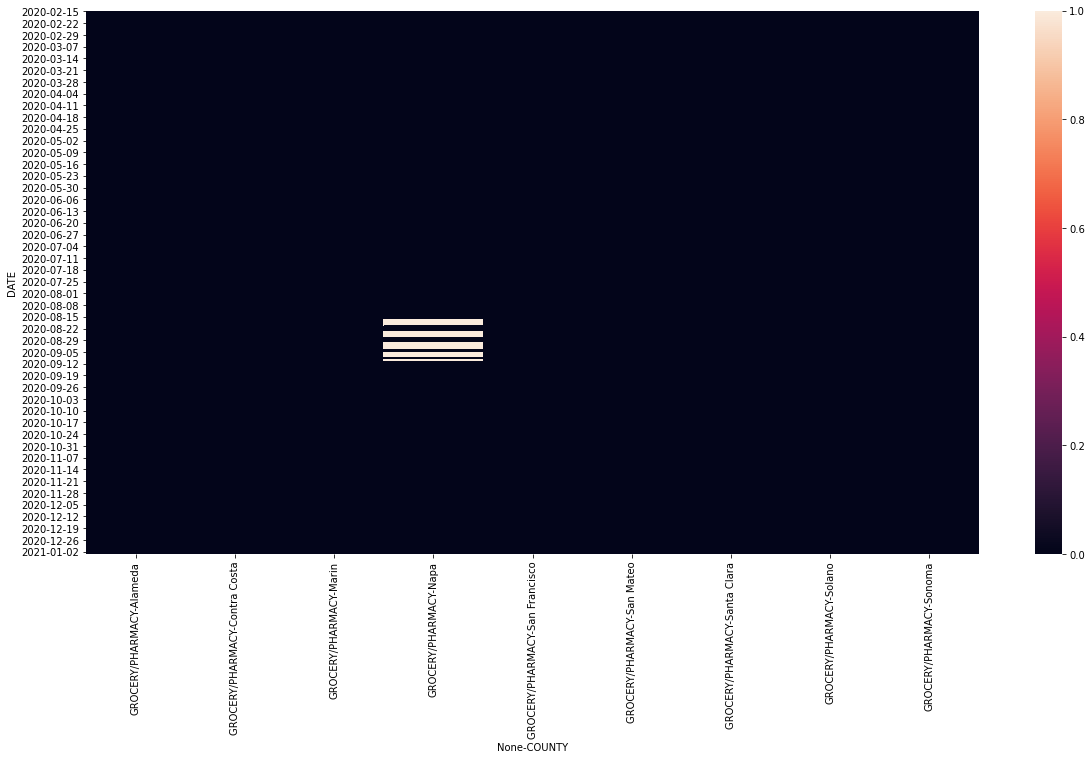

In [13]:
ax = plt.figure(figsize=(20, 10))
sns.heatmap(BA_Mobility.pivot(index='DATE', columns=['COUNTY'], values=['GROCERY/PHARMACY']).isnull())

<AxesSubplot:xlabel='None-COUNTY', ylabel='DATE'>

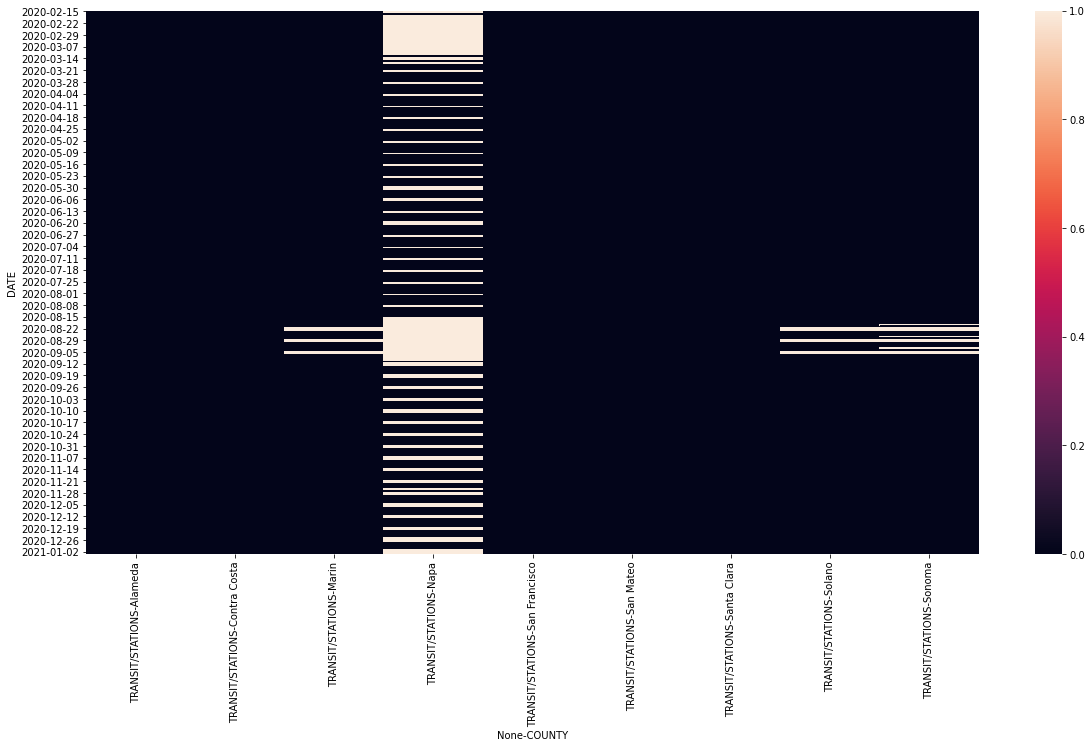

In [14]:
ax = plt.figure(figsize=(20, 10))
sns.heatmap(BA_Mobility.pivot(index='DATE', columns=['COUNTY'], values=['TRANSIT/STATIONS']).isnull())

<AxesSubplot:xlabel='None-COUNTY', ylabel='DATE'>

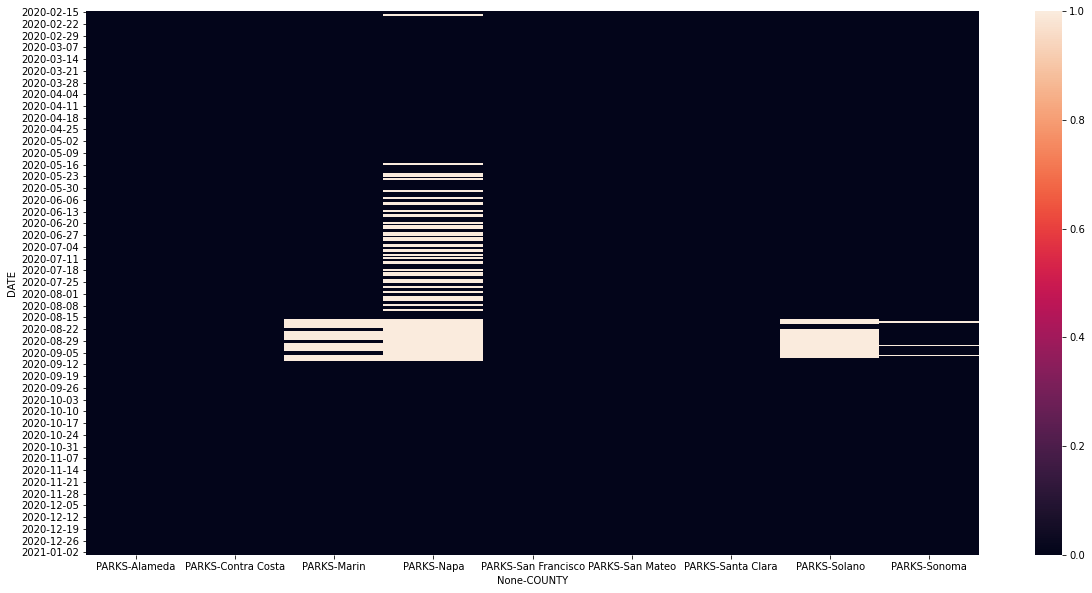

In [15]:
ax = plt.figure(figsize=(20, 10))
sns.heatmap(BA_Mobility.pivot(index='DATE', columns=['COUNTY'], values=['PARKS']).isnull())

In [16]:
BA_Mobility.loc[BA_Mobility['WORKPLACES'].isnull()] # Happening During Weekends

,COUNTY,DATE,RETAIL/RECREATION,GROCERY/PHARMACY,PARKS,TRANSIT/STATIONS,WORKPLACES,RESIDENTIAL
838,Marin,2020-08-23,-38.0,-15.0,-14.0,NaN,NaN,9.0
845,Marin,2020-08-30,-30.0,-15.0,10.0,NaN,NaN,7.0
852,Marin,2020-09-06,-24.0,-7.0,53.0,NaN,NaN,5.0
1161,Napa,2020-08-22,-38.0,-21.0,NaN,NaN,NaN,7.0
1162,Napa,2020-08-23,-36.0,-23.0,NaN,NaN,NaN,7.0
1168,Napa,2020-08-29,-33.0,-22.0,NaN,NaN,NaN,6.0
1169,Napa,2020-08-30,-28.0,-21.0,NaN,NaN,NaN,5.0
1175,Napa,2020-09-05,-27.0,-14.0,NaN,NaN,NaN,5.0
1176,Napa,2020-09-06,-23.0,NaN,NaN,NaN,NaN,4.0


In [17]:
BA_Mobility.loc[BA_Mobility['RESIDENTIAL'].isnull()] # Happening During Weekends

,COUNTY,DATE,RETAIL/RECREATION,GROCERY/PHARMACY,PARKS,TRANSIT/STATIONS,WORKPLACES,RESIDENTIAL
1008,Napa,2020-03-22,-52.0,-30.0,24.0,NaN,-45.0,NaN
1015,Napa,2020-03-29,-53.0,-34.0,-24.0,NaN,-51.0,NaN
1022,Napa,2020-04-05,-59.0,-37.0,-52.0,NaN,-52.0,NaN
1029,Napa,2020-04-12,-61.0,-38.0,-2.0,NaN,-52.0,NaN
1036,Napa,2020-04-19,-64.0,-26.0,0.0,NaN,-47.0,NaN
1043,Napa,2020-04-26,-59.0,-17.0,34.0,NaN,-46.0,NaN


In [18]:
BA_Mobility.to_csv('Data/BA_County_Mobility_2020.csv', index=False)

We also created a dictionary of the Mobility Data by County

In [19]:
for c in BA_COUNTIES.keys():
    ib = np.array(BA_Mobility['COUNTY']==c)
    temp = BA_Mobility.loc[BA_Mobility['COUNTY']==c,('DATE','RETAIL/RECREATION','GROCERY/PHARMACY','PARKS',
                                  'TRANSIT/STATIONS','WORKPLACES','RESIDENTIAL')]
    temp.index = temp['DATE']
    temp = temp[['RETAIL/RECREATION','GROCERY/PHARMACY','PARKS',
                                  'TRANSIT/STATIONS','WORKPLACES','RESIDENTIAL']]
    BA_COUNTIES[c]['Mobility'] =temp.to_dict('index')
BA_COUNTIES

{'Alameda': {'GEOID': 6001,
  'NAME': 'Alameda',
  'POPULATION_2010': 1510271,
  'HOUSING_2010': 582549,
  'LAND_AREA_SQ_METER': 1914046110,
  'LAND_AREA_SQ_MILES': 739.0169999999999,
  'LATITUDE': 37.648081,
  'LONGITUDE': -121.91330400000001,
  'ZIP_CODES': [94550,
   94586,
   94551,
   94552,
   94539,
   94545,
   94587,
   94566,
   95391,
   94588,
   94538,
   94619,
   94568,
   94536,
   94560,
   95377,
   94555,
   94544,
   94546,
   94605,
   94577,
   94501,
   94621,
   94514,
   94541,
   94611,
   94607,
   94542,
   94578,
   94580,
   94705,
   94602,
   94603,
   94601,
   94579,
   94608,
   94502,
   94618,
   94606,
   94610,
   94710,
   94609,
   94706,
   94708,
   94703,
   94702,
   94707,
   94704,
   94612,
   94505,
   94720,
   94709,
   94613],
  'Mobility': {'2020-02-15': {'RETAIL/RECREATION': 1.0,
    'GROCERY/PHARMACY': 0.0,
    'PARKS': 22.0,
    'TRANSIT/STATIONS': 1.0,
    'WORKPLACES': 0.0,
    'RESIDENTIAL': -1.0},
   '2020-02-16': {'RETAIL/REC

For the Bay Area as a whole (Using the 2010 Population to get the weighted average):

In [20]:
BA_pop = 0
w_ccp = []
zca = list(BA_COUNTIES.keys())

for zc in BA_COUNTIES:
    BA_pop = BA_pop +  BA_COUNTIES[zc]['POPULATION_2010']

for zc in BA_COUNTIES:
        w_ccp.append(BA_COUNTIES[zc]['POPULATION_2010']/BA_pop)

print('The Total Bay Area Population is ', BA_pop, '2010 \n')

for zc in range(len(zca)):
    print(zca[zc],'County has', round(w_ccp[zc]*100), '% of the Bay Area population \n')

The Total Bay Area Population is  7150739 2010 

Alameda County has 21 % of the Bay Area population 

Contra Costa County has 15 % of the Bay Area population 

Marin County has 4 % of the Bay Area population 

Napa County has 2 % of the Bay Area population 

San Francisco County has 11 % of the Bay Area population 

San Mateo County has 10 % of the Bay Area population 

Santa Clara County has 25 % of the Bay Area population 

Solano County has 6 % of the Bay Area population 

Sonoma County has 7 % of the Bay Area population 



In [21]:
BA = {}
date_range = list(BA_Mobility['DATE'].unique())

for ks in date_range:
    BA[ks] = {}
    aveqr,aveqg,aveqp,aveqt,aveqw,aveqh = 0,0,0,0,0,0
    for zc in range(len(zca)):
        if not pd.isna(BA_COUNTIES[zca[zc]]['Mobility'][ks]['RETAIL/RECREATION']):
            aveqr = aveqr + w_ccp[zc]*BA_COUNTIES[zca[zc]]['Mobility'][ks]['RETAIL/RECREATION']
        if not pd.isna(BA_COUNTIES[zca[zc]]['Mobility'][ks]['GROCERY/PHARMACY']):
            aveqg = aveqg + w_ccp[zc]*BA_COUNTIES[zca[zc]]['Mobility'][ks]['GROCERY/PHARMACY']
        if not pd.isna(BA_COUNTIES[zca[zc]]['Mobility'][ks]['TRANSIT/STATIONS']):
            aveqt = aveqt + w_ccp[zc]*BA_COUNTIES[zca[zc]]['Mobility'][ks]['TRANSIT/STATIONS']
        if not pd.isna(BA_COUNTIES[zca[zc]]['Mobility'][ks]['WORKPLACES']):
            aveqw = aveqw + w_ccp[zc]*BA_COUNTIES[zca[zc]]['Mobility'][ks]['WORKPLACES']
        if not pd.isna(BA_COUNTIES[zca[zc]]['Mobility'][ks]['PARKS']):
            aveqp = aveqp + w_ccp[zc]*BA_COUNTIES[zca[zc]]['Mobility'][ks]['PARKS']
        if not pd.isna(BA_COUNTIES[zca[zc]]['Mobility'][ks]['RESIDENTIAL']):
            aveqh = aveqh + w_ccp[zc]*BA_COUNTIES[zca[zc]]['Mobility'][ks]['RESIDENTIAL']
    BA[ks]['RETAIL/RECREATION'] = round(aveqr*10)/10
    BA[ks]['GROCERY/PHARMACY'] = round(aveqg*10)/10    
    BA[ks]['TRANSIT/STATIONS'] = round(aveqt*10)/10    
    BA[ks]['WORKPLACES'] = round(aveqw*10)/10    
    BA[ks]['PARKS'] = round(aveqp*10)/10    
    BA[ks]['RESIDENTIAL'] = round(aveqh*10)/10    

In [22]:
BA_table = pd.DataFrame.from_dict(BA,orient='index')
BA_table['DATE'] = BA_table.index
BA_table.head(10)

,RETAIL/RECREATION,GROCERY/PHARMACY,TRANSIT/STATIONS,WORKPLACES,PARKS,RESIDENTIAL,DATE
2020-02-15,1.2,0.3,1.8,-0.8,23.4,-1.0,2020-02-15
2020-02-16,5.3,0.0,4.0,-0.3,31.0,-1.9,2020-02-16
2020-02-17,12.1,3.2,-23.2,-52.6,66.5,10.6,2020-02-17
2020-02-18,-1.1,0.9,2.8,-2.9,21.8,0.2,2020-02-18
2020-02-19,-0.9,-0.9,-0.6,-2.4,13.4,0.4,2020-02-19
2020-02-20,0.8,0.1,0.8,-2.8,17.3,0.2,2020-02-20
2020-02-21,-0.4,-0.6,-1.6,-1.2,11.0,0.5,2020-02-21
2020-02-22,0.4,1.9,-1.4,2.7,22.7,-0.9,2020-02-22
2020-02-23,3.5,3.7,5.2,3.2,27.7,-0.9,2020-02-23
2020-02-24,0.9,1.0,1.1,3.5,14.7,-0.2,2020-02-24


In [23]:
BA_table.to_csv('Data/BA_MOB_SUMMARY.csv', index=False)